# Boston Air BnB Analysis

In [119]:
#impoting libraries
import pandas as pd
import seaborn as sns

In [24]:
#loading dataframes and exploring different files

cl=pd.read_csv('calendar.csv')
lst = pd.read_csv('listings.csv')
rv = pd.read_csv('reviews.csv')

In [141]:
cl=pd.read_csv('calendar.csv')
cl.head()
cl.count()

listing_id    1393570
date          1393570
available     1393570
price          934542
dtype: int64

In [142]:
#to clean data i chose to remove rows with missing data 
cl.dropna(inplace=True)

In [143]:
#check file after cleaning
cl.count()

listing_id    934542
date          934542
available     934542
price         934542
dtype: int64

In [133]:
#got error bec they are not int
cl.listing_id=cl.listing_id.astype(str).astype(int)
cl.available=cl.available.astype(str).astype(bool)


NameError: name 'date' is not defined

In [136]:
cl.date=cl.available.astype('datetime64[ns]')
cl.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                 object
dtype: object

In [137]:
cl.price.replace({'\$':''},regex=True,inplace=True)
cl.price.replace({'\,':''},regex=True,inplace=True)
cl.price=cl.price.astype(str).astype(float)
cl.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [42]:
#check lst file
lst.shape
lst.count()
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [46]:
lst.count()
lst.property_type.count()


3817

In [47]:
lst.price.count()

3818

In [91]:
#lst.groupby(lst.property_type).mean().price
#got error bec price have $ 
lst.price.replace({'\$':''},regex=True,inplace=True)
lst.price.replace({'\,':''},regex=True,inplace=True)
lst.price.astype(str).astype(float)

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
5       120.0
6        80.0
7        60.0
8        90.0
9       150.0
10       95.0
11       99.0
12      245.0
13      165.0
14      461.0
15      109.0
16       66.0
17       99.0
18      200.0
19      700.0
20      110.0
21       99.0
22      450.0
23       75.0
24      600.0
25      450.0
26      150.0
27       45.0
28      300.0
29       80.0
        ...  
3788    115.0
3789     60.0
3790    175.0
3791     85.0
3792    109.0
3793    109.0
3794    107.0
3795    200.0
3796     85.0
3797     70.0
3798     77.0
3799     65.0
3800    185.0
3801    108.0
3802    200.0
3803    250.0
3804    125.0
3805    100.0
3806    160.0
3807    109.0
3808    175.0
3809    120.0
3810    154.0
3811     65.0
3812     95.0
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [92]:
lst.price

0        85.00
1       150.00
2       975.00
3       100.00
4       450.00
5       120.00
6        80.00
7        60.00
8        90.00
9       150.00
10       95.00
11       99.00
12      245.00
13      165.00
14      461.00
15      109.00
16       66.00
17       99.00
18      200.00
19      700.00
20      110.00
21       99.00
22      450.00
23       75.00
24      600.00
25      450.00
26      150.00
27       45.00
28      300.00
29       80.00
         ...  
3788    115.00
3789     60.00
3790    175.00
3791     85.00
3792    109.00
3793    109.00
3794    107.00
3795    200.00
3796     85.00
3797     70.00
3798     77.00
3799     65.00
3800    185.00
3801    108.00
3802    200.00
3803    250.00
3804    125.00
3805    100.00
3806    160.00
3807    109.00
3808    175.00
3809    120.00
3810    154.00
3811     65.00
3812     95.00
3813    359.00
3814     79.00
3815     93.00
3816     99.00
3817     87.00
Name: price, Length: 3818, dtype: object

In [96]:

lst.price=lst.price.astype(str).astype(float)

In [97]:
lst.price


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
5       120.0
6        80.0
7        60.0
8        90.0
9       150.0
10       95.0
11       99.0
12      245.0
13      165.0
14      461.0
15      109.0
16       66.0
17       99.0
18      200.0
19      700.0
20      110.0
21       99.0
22      450.0
23       75.0
24      600.0
25      450.0
26      150.0
27       45.0
28      300.0
29       80.0
        ...  
3788    115.0
3789     60.0
3790    175.0
3791     85.0
3792    109.0
3793    109.0
3794    107.0
3795    200.0
3796     85.0
3797     70.0
3798     77.0
3799     65.0
3800    185.0
3801    108.0
3802    200.0
3803    250.0
3804    125.0
3805    100.0
3806    160.0
3807    109.0
3808    175.0
3809    120.0
3810    154.0
3811     65.0
3812     95.0
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [98]:
lst.groupby(lst.property_type).mean().price

property_type
Apartment          122.932670
Bed & Breakfast    112.054054
Boat               282.375000
Bungalow           115.615385
Cabin              104.666667
Camper/RV          120.461538
Chalet              98.500000
Condominium        151.109890
Dorm                39.500000
House              132.351414
Loft               135.700000
Other               94.681818
Tent                54.000000
Townhouse          129.457627
Treehouse          101.000000
Yurt               100.000000
Name: price, dtype: float64

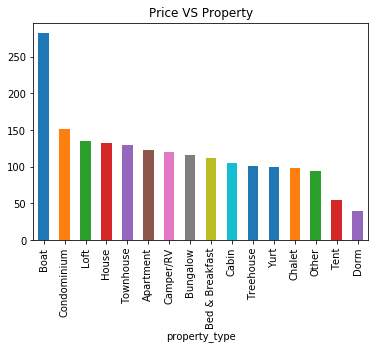

In [111]:
properties=lst.groupby(lst.property_type).mean().price
properties.sort_values(ascending=False).plot(kind="bar",title='Price VS Property')

In [116]:
df = lst[['bedrooms','bathrooms','beds','square_feet','price','reviews_per_month']]
df.count()

bedrooms             3812
bathrooms            3802
beds                 3817
square_feet            97
price                3818
reviews_per_month    3191
dtype: int64

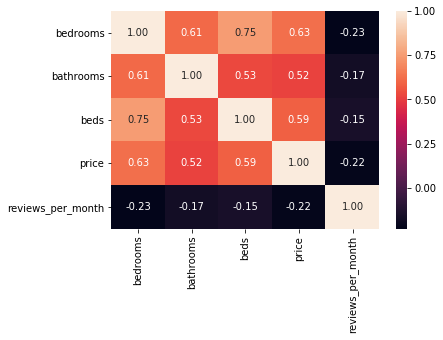

In [120]:
#found sqaure feet with limited number of info , so going to drop it
dff = lst[['bedrooms','bathrooms','beds','price','reviews_per_month']]
sns.heatmap(dff.corr(), annot=True, fmt=".2f")

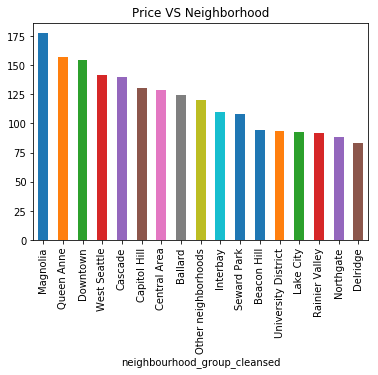

In [151]:
neighborhoods=lst.groupby(lst.neighbourhood_group_cleansed).mean().price
neighborhoods.sort_values(ascending=False).plot(kind="bar",title='Price VS Neighborhood')